<a href="https://colab.research.google.com/github/dariaAlium/List/blob/master/Lab_1_Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

In [165]:
data = pd.read_csv("students_data.csv")
data.shape
data.head(50)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [139]:
sign = {'ID',	'Subject',	'school',	'sex',	'age',	'address',	'famsize',	
        'Pstatus',	'Medu',	'Fedu',	'Mjob',	'Fjob',	'reason',	'guardian',
        'traveltime',	'studytime',	'failures',	'schoolsup',	'famsup',	'paid',	
        'activities',	'nursery',	'higher',	'internet',	'romantic',	'famrel',	
        'freetime',	'goout',	'Dalc',	'Walc',	'health',	'absences',	'cheating',	'G1',	'G2',	'G3'}
signs = pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')
signs.head(40)

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  
## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 10](#task10)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [140]:
signs['defenitions'] = ['descrete', 'nominal', 'nominal', 
                       'nominal', 'descrete', 'nominal', 
                       'ordinal', 'nominal', 'ordinal', 
                       'ordinal', 'nominal', 'nominal',
                        'nominal', 'nominal', 'ordinal', 
                        'ordinal',
                       'ordinal',	'binary' , 'binary',
                        'binary', 'binary',	'binary',
                        'binary',	'binary', 'binary',
                        'ordinal',	'ordinal',	'ordinal',
                        'ordinal',	'ordinal',	'ordinal',
                        'descrete',	'binary', 'ordinal',
                        'ordinal',	'ordinal']
priznaky = signs['Признак'].values.tolist()
opisanie =  signs['defenitions'].values.tolist()
signs.head(40) 

,Признак,Описание,defenitions
0,ID,Уникальный номер наблюдения,descrete
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык",nominal
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira",nominal
3,sex,"Пол студента: 'F' - женский, 'M' - мужской",nominal
4,age,Возраст студента,descrete
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом",nominal
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3",ordinal
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно",nominal
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование",ordinal
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование",ordinal


In [0]:

def find_mistales(tmp, v1, top):
    for j in range(len(tmp)):
        if  tmp[j] not in v1:
            tmp[j] = top
    return tmp

def check_mistakes():
    for i in range(len(priznaky)):
        tmp = data[priznaky[i]].values.tolist()

        if opisanie[i] == 'binary':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'yes', 'no'}, 'no'))

        if opisanie[i] == 'descrete':
            for j in range(len(tmp)):
                if not str(tmp[j]).isdigit():
                    tmp[j] = NaN
            data[priznaky[i]] = pd.DataFrame(tmp)

        if priznaky[i] == 'Subject':
            data[priznaky[i]] = pd.DataFrame(pd.DataFrame(find_mistales(tmp, {'Por', 'Math'}, data[priznaky[i]].describe()[2])))

        if priznaky[i] == 'school':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'GP', 'MS'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'sex':
            tmp = find_mistales(tmp, {'F', 'M'}, data[priznaky[i]].describe()[2])
            for j in range(len(tmp)):
                if tmp[j] == 'm':
                    tmp[j] = 'M'
            data[priznaky[i]] = pd.DataFrame(tmp)

        if priznaky[i] == 'address':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'U', 'R'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'famsize':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'GT3', 'LE3'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'Pstatus':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'A', 'T'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'guardian':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'father', 'mother'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'Medu':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'1', '2', '3', '4'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'Fedu':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'1', '2', '3', '4'}, data[priznaky[i]].describe()[2]))

check_mistakes()


### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [167]:
A = data.isnull() #True/False 

print('Missing values by features:', A.sum(), sep='\n')
print('Missing values :', A.sum().sum(),)


data.drop(['cheating'], axis='columns', inplace=True) #удаляем читеров, потому что 700 неизвестных


data = data.dropna() #

Missing values by features:
ID            0  
Subject       0  
school        0  
sex           0  
age           0  
address       0  
famsize       0  
Pstatus       0  
Medu          0  
Fedu          0  
Mjob          0  
Fjob          0  
reason        0  
guardian      0  
traveltime    0  
studytime     0  
failures      0  
schoolsup     0  
famsup        0  
paid          0  
activities    0  
nursery       0  
higher        0  
internet      0  
romantic      10 
famrel        10 
freetime      0  
goout         0  
Dalc          10 
Walc          10 
health        0  
absences      0  
cheating      700
G1            0  
G2            0  
G3            0  
dtype: int64
Missing values : 740


### Задание 3  
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [143]:
print(data['school'].value_counts())

print(data['Subject'].value_counts())
print('In Por', pd.DataFrame(data.loc[(data['Subject'] == 'Por') & 
                                      (data['failures'] > 0)])['ID'].count())
print('In Math', pd.DataFrame(data.loc[(data['Subject'] == 'Math') & 
                                       (data['failures'] > 0)])['ID'].count())
print('Время на учебу por:', pd.DataFrame(data.loc[(data['Subject'] == 'Por')]
                                          )['studytime'].mean())
print('Время на учебу math:', pd.DataFrame(data.loc[(data['Subject'] == 'Math')]
                                           )['studytime'].mean())
print('частая причина:', data['reason'].describe().to_list()[2])

GP    746
MS    268
Name: school, dtype: int64
Por     632
Math    382
Name: Subject, dtype: int64
In Por 98
In Math 80
Время на учебу por: 1.9303797468354431
Время на учебу math: 2.0366492146596857
частая причина: course


### Задание 4  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

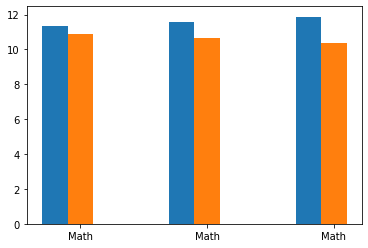

'\nвыводы:\nочевидно, что студенты с курсов математики получают оценки, \nзначительно ниже чем ученики с языковых курсов\n\nтак же мы видим, что с прошествием времени разница между\nоценками увеличивается\n\nсмею прдположить, что это в виду усталости\n'

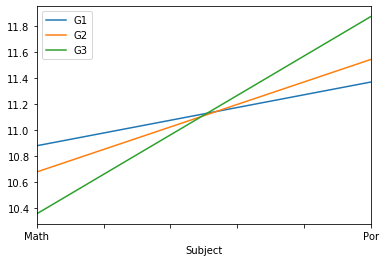

In [144]:
x = [pd.DataFrame(data.loc[(data['Subject'] == 'Por')]['G1']).mean(),
      pd.DataFrame(data.loc[(data['Subject'] == 'Por')])['G2'].mean(),
      pd.DataFrame(data.loc[(data['Subject'] == 'Por')])['G3'].mean()]
y = [pd.DataFrame(data.loc[(data['Subject'] == 'Math')])['G1'].mean(),
      pd.DataFrame(data.loc[(data['Subject'] == 'Math')])['G2'].mean(),
      pd.DataFrame(data.loc[(data['Subject'] == 'Math')])['G3'].mean()]
plt.bar([1.9, 2.9, 3.9], x, width=0.2)
plt.bar([2.1, 3.1, 4.1], y, width=0.2, tick_label='Math')
plt.show()

df = data[['G1'] + ['G2'] + ['G3'] +  ['Subject']]
df.groupby('Subject').mean().plot()
'''
выводы:
очевидно, что студенты с курсов математики получают оценки, 
значительно ниже чем ученики с языковых курсов

так же мы видим, что с прошествием времени разница между
оценками увеличивается

смею прдположить, что это в виду усталости
'''

### Задание 5  
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

'\nсодержательный комментарий:\n\nКак можно заметить, наибольшую кореляцию имеют между собой оценки за полугодия,\nчто было ожидаемо, так как ученики в большинстве случаев имеют равномерное \nраспределение оценок\n\nна оценки так же больше всего влияет время, потраченное на обучение, о чем нам \nговорит коэфициент корреляции равный 0.3\n\nотрицательную корреляцию с оценками за полугодие имеет показатель заваленных \nпредметов в прошлом, что так же было ожидаемо, ведь чем меньше заваленных \nпредметов в прошлом, тем выше вероятность получить высокую оценку в настоящем\n\nтак же можно заметить, что шкала потребления алкоголя отрицательно сказывается \nна время, затраченное на обучение, но не влияет на оценки за полугодие\n\nпотребление алкоголя зависит от свободного времени и от времени проведенного \nс друзьями\n\nна графу (failures) наибольшее влияние оказывает возраст студентов\n\n'

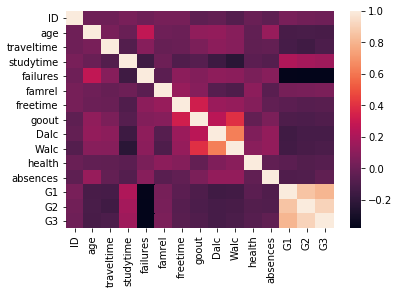

In [145]:
corr = data.corr() 
sb.heatmap(corr, xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values) 


'''
содержательный комментарий:

Как можно заметить, наибольшую кореляцию имеют между собой оценки за полугодия,
что было ожидаемо, так как ученики в большинстве случаев имеют равномерное 
распределение оценок

на оценки так же больше всего влияет время, потраченное на обучение, о чем нам 
говорит коэфициент корреляции равный 0.3

отрицательную корреляцию с оценками за полугодие имеет показатель заваленных 
предметов в прошлом, что так же было ожидаемо, ведь чем меньше заваленных 
предметов в прошлом, тем выше вероятность получить высокую оценку в настоящем

так же можно заметить, что шкала потребления алкоголя отрицательно сказывается 
на время, затраченное на обучение, но не влияет на оценки за полугодие

потребление алкоголя зависит от свободного времени и от времени проведенного 
с друзьями

на графу (failures) наибольшее влияние оказывает возраст студентов

'''

### Задание 6  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

In [174]:
data_describe = data.describe(include=[object])

categorical_columns = [c for c in data.columns if data[c].dtype.name == 
                       'object'] #категориальные признаки

non_data = pd.DataFrame(data[categorical_columns]) 

non_data['Fedu'] = non_data.Fedu.astype('int64') 
non_data['Medu'] = non_data.Medu.astype('int64')

categorical_columns.remove('Medu')
categorical_columns.remove('Fedu')

for c in categorical_columns:
  q = range(1, 1 + non_data[c].describe(include=[object])['unique']) # готовим цифры на замену категориям

  unique = dict(zip(non_data[c].unique(), q))

  tmp = non_data[c].values.tolist()

  if (q[-1] == 2) & ((tmp[0] == 'no') | (tmp[0] == 'yes')):

    yes_no = {'yes': 1, 'no': 0}
    non_data[c] = data[c].map(yes_no)

  else:

    for i in range(len(tmp)):
      tmp[i] = unique[tmp[i]]
    non_data[c] = pd.DataFrame(tmp)

non_data['G1'] = data['G1']
non_data['G2'] = data['G2']
non_data['G3'] = data['G3']

corr = non_data.corr()

sb.heatmap(corr, xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)

print('Платные занятия по por', 
      pd.DataFrame(data.loc[(data['Subject'] == 'Por') 
      & (data['paid'] == 'yes')])['ID'].count())
print('Платные занятия по math', 
      pd.DataFrame(data.loc[(data['Subject'] == 'Math') 
      & (data['paid'] == 'yes')])['ID'].count())

'''
развернутый комментарий:
из категориальных признаков на оценки учеников в большинстве случаев влияние
оказывает образование, полученное матерью и отцом

нельзя не обратить внимание и на то, что корелляция между образованием матери
и отца довольно высокая, вследствие понятных причин

так же выбор школы существенно зависит от адреса проживания 

так же выбор предмета и наличие платных занятий сильно коррелируют, это 
заставило меня проверить количество платных занятий по тому и иному курсу
и я выяснила, что ребята, посещающие математику, преобретают допалнительные 
занятия в 4,6 раз чаще

Оценки имеют высокую по модулю корреляцию с предметом, что на основани прошлых
выводов позволяет нам сказать, что ученикам труднее дается именно математика
'''

ValueError: ignored

### Задание  7  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

### Задание 8     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


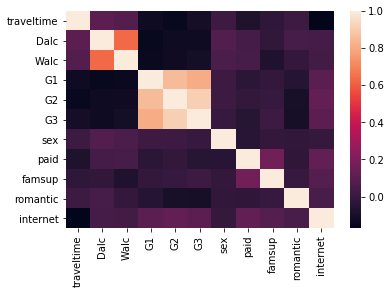

In [147]:
data_for_8 = data[['traveltime', 'Dalc', 'Walc', 'G1', 'G2', 'G3']]
data_for_8[['sex', 'paid', 'famsup', 'romantic', 
            'internet']] = non_data[['sex', 'paid', 'famsup', 'romantic', 'internet']]
corr = data_for_8.corr()
sb.heatmap(corr, xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)

### Задание 9  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

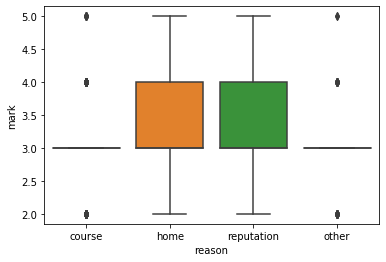

In [170]:
def rule(g):
  if 18 <= g <= 20 :
    return 5
  elif 14 <= g <= 17:
    return 4
  elif 8 <= g <= 13:
    return 3
  else:
    return 2
tmp = data[['G1', 'G2', 'G3']]
data['mark'] = tmp.apply(lambda x: rule(x['G1']), axis =  1)
sb.boxplot(x="reason", y="mark", data=data)

### Задание  10 <a id="task10"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [172]:

Id = data['ID'].values.tolist()
#data_same = pd.DataFrame()
id_same = set()
'''
способ такой:
subject противоположный
одинаковые характеристики: все, не связанные с текущим предметом
'''
for i in range(len(Id)):
  if i not in id_same:
    current = {'Subject': data.iloc[i][1], 'school': data.iloc[i][2],
               'sex': data.iloc[i][3], 'age': data.iloc[i][4], 'address': data.iloc[i][5],
               'famsize': data.iloc[i][6], 'Pstatus': data.iloc[i][7],
               'Medu': data.iloc[i][8], 'Fedu': data.iloc[i][9],
               'Mjob': data.iloc[i][10], 'Fjob': data.iloc[i][11],
               'reason':data.iloc[i][12], 'activities':data.iloc[i][20], 'health':data.iloc[i][30],
               'Walc': data.iloc[i][29],
               'Dalc': data.iloc[i][28],
               'traveltime': data.iloc[i][14], 'internet': data.iloc[i][23], 'guardian': data.iloc[i][13],
               'romantic': data.iloc[i][23], 'freetime': data.iloc[i][26], 'goout': data.iloc[i][27]}
    if current['Subject'] == 'Por':
        tmp = pd.DataFrame(data.loc[(data['school'] == current['school']) & (data['Pstatus'] == current['Pstatus']) &
    (data['sex'] == current['sex']) & (data['age'] == current['age']) &
    (data['address'] == current['address']) & (data['famsize'] == current['famsize']) &
    (data['Medu'] == current['Medu']) & (data['Fedu'] == current['Fedu']) &
    (data['Mjob'] == current['Mjob']) & (data['Fjob'] == current['Fjob']) &
    (data['traveltime'] == current['traveltime']) & (data['internet'] == current['internet']) &
                                     (data['Subject'] == 'Math') & (data['reason'] == current['reason'])
                            & (data['health'] == current['health'])
                            & (data['activities'] == current['activities'])
                            & (data['Walc'] == current['Walc'])
                            & (data['Dalc'] == current['Dalc'])
                            & (data['guardian'] == current['guardian'])
                            & (data['romantic'] == current['romantic'])
                            & (data['freetime'] == current['freetime'])
                                     & (data['freetime'] == current['goout'])
                            ])
        if not tmp.empty:
            id_same.add(i)
            id_same.add(tmp.values.tolist()[0][0])
    else:
        tmp = pd.DataFrame(data.loc[(data['school'] == current['school']) & (data['Pstatus'] == current['Pstatus']) &
                 (data['sex'] == current['sex']) & (data['age'] == current['age']) &
                 (data['address'] == current['address']) & (data['famsize'] == current['famsize']) &
                 (data['Medu'] == current['Medu']) & (data['Fedu'] == current['Fedu']) &
                 (data['Mjob'] == current['Mjob']) & (data['Fjob'] == current['Fjob']) &
                 (data['traveltime'] == current['traveltime']) & (data['internet'] == current['internet']) &
                                     (data['Subject'] == 'Por')
                                     & (data['reason'] == current['reason'])
                                     & (data['health'] == current['health'])
                                     & (data['activities'] == current['activities'])
                                     & (data['Walc'] == current['Walc'])
                                     & (data['Dalc'] == current['Dalc'])
                                     & (data['guardian'] == current['guardian'])
                                     & (data['romantic'] == current['romantic'])
                                     & (data['freetime'] == current['freetime'])
                                     & (data['freetime'] == current['goout'])
                            ])
        if not tmp.empty:
            id_same.add(i)
            id_same.add(tmp.values.tolist()[0][0])
print('таких студентов: ', (len(id_same))/2)


таких студентов:  108.0


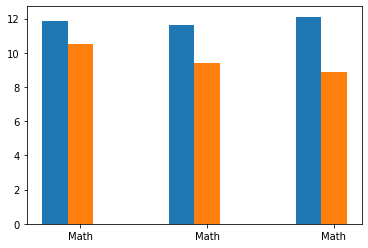

'\nкак видно из данной диаграммы, оценки по языку в течении семестров не меняются, \nтогда как оценки по математики существенно снижаются по временному промежутку,\nхотя и изначально были ниже, чем оценки по языку\n'

In [150]:
id_same = sorted(list(id_same))
data_same = pd.DataFrame(data.iloc[id_same[:40]])
x = [data_same.loc[data_same['Subject'] == 'Por']['G1'].mean(),
     data_same.loc[data_same['Subject'] == 'Por']['G2'].mean(),
      data_same.loc[data_same['Subject'] == 'Por']['G3'].mean()]
y = [data_same.loc[data_same['Subject'] == 'Math']['G1'].mean(),
      data_same.loc[data_same['Subject'] == 'Math']['G2'].mean(),
      data_same.loc[data_same['Subject'] == 'Math']['G3'].mean()]
plt.bar([1.9, 2.9, 3.9], x, width=0.2)
plt.bar([2.1, 3.1, 4.1], y, width=0.2, tick_label='Math')
plt.show()
'''
как видно из данной диаграммы, оценки по языку в течении семестров не меняются, 
тогда как оценки по математики существенно снижаются по временному промежутку,
хотя и изначально были ниже, чем оценки по языку
'''

### Задание 11  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [173]:
'''
на основании прошлых заданий было выявленно, что оценка зависит от:
studytime & failures
в свою очередь эти колонки зависят от потребления алкоголя
'''
from sklearn import metrics
from sklearn.cluster import KMeans
Z = KMeans(n_clusters = 4, # число кластеров
           init = 'random',
          n_init = 1,
        max_iter = 100, 
        random_state=15434,
          )
data_k = data[['studytime', 'failures','Dalc', 'Walc']]
Z.fit(data_k)


data['prediction'] = Z.labels_.astype(str)

def rule1(mark):
  return mark+2
data['prediction'] = data.prediction.astype('int64')
data['mark'] = data.mark.astype('int64')
data['prediction'] = data.apply(lambda x: rule1(x['prediction']), axis =  1)
print(data['prediction'].describe())
print(data['mark'].describe())
data['prediction'] = data.prediction.astype('object')
data['mark'] = data.mark.astype('object')
score = metrics.accuracy_score(data['mark'].describe().values.tolist(), 
               data['prediction'].describe().values.tolist())

print('модель предсказывает оценки с точностью {:d}'.format(int(score*100)))
'''
как видно из описания колонок, модель, предсказывающая оценки, со своей задачей 
справляется довольно таки неплохо, предсказывая оценки с точность 75%
'''

count    1004.000000
mean     3.300797   
std      0.810671   
min      2.000000   
25%      3.000000   
50%      3.000000   
75%      4.000000   
max      5.000000   
Name: prediction, dtype: float64
count    1004.000000
mean     3.138446   
std      0.624967   
min      2.000000   
25%      3.000000   
50%      3.000000   
75%      3.000000   
max      5.000000   
Name: mark, dtype: float64
модель предсказывает оценки с точностью 75


'\nкак видно из описания колонок, модель, предсказывающая оценки, со своей задачей \nсправляется довольно таки неплохо, предсказывая оценки с точность 75%\n'

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

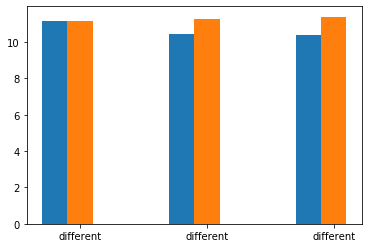

'\nкак видно по графику, в первом полугодии нет разницы между студентами,\nкоторые выбрали один курс и которые выбрали оба, но с увеличением времени, \nэта разница все более заметна в лучшую сторону для тех, кто выбрал 1 предмет\n'

In [160]:
tmp = range(data['ID'].count())
data_different = [x for x in tmp if x not in id_same]
data_different = pd.DataFrame(data.iloc[data_different])
x = [data_same['G1'].mean(),
     data_same['G2'].mean(),
      data_same['G3'].mean()]
y = [data_different['G1'].mean(),
      data_different['G2'].mean(),
      data_different['G3'].mean()]
plt.bar([1.9, 2.9, 3.9], x, width=0.2, tick_label = 'same')
plt.bar([2.1, 3.1, 4.1], y, width=0.2, tick_label='different')
plt.show()
'''
как видно по графику, в первом полугодии нет разницы между студентами,
которые выбрали один курс и которые выбрали оба, но с увеличением времени, 
эта разница все более заметна в лучшую сторону для тех, кто выбрал 1 предмет
'''

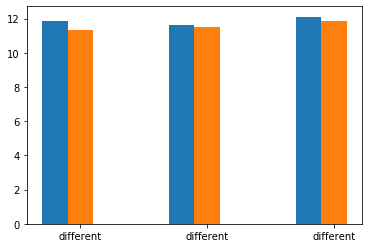

In [161]:
x = [data_same.loc[data_same['Subject'] == 'Por']['G1'].mean(),
     data_same.loc[data_same['Subject'] == 'Por']['G2'].mean(),
      data_same.loc[data_same['Subject'] == 'Por']['G3'].mean()]
y = [data_different.loc[data_different['Subject'] == 'Por']['G1'].mean(),
     data_different.loc[data_different['Subject'] == 'Por']['G2'].mean(),
      data_different.loc[data_different['Subject'] == 'Por']['G3'].mean()]
plt.bar([1.9, 2.9, 3.9], x, width=0.2, tick_label = 'same')
plt.bar([2.1, 3.1, 4.1], y, width=0.2, tick_label='different')
plt.show()